<a href="https://colab.research.google.com/github/lifod/TSC/blob/main/%EC%BD%94%EC%82%AC%EC%9D%B8%EC%9C%A0%EC%82%AC%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ▶빈도수 벡터를 이용한 코사인 유사도(빈도수 직접 입력)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

sen1=np.array([5,4,4,0,0])
sen2=np.array([1,0,0,5,0])
sen3=np.array([0,0,0,4,5])
sen4=np.array([1,4,0,4,0])
column=["사과","바나나","수박","멜론","참외"]
bow=[sen1,sen2,sen3,sen4]
df=pd.DataFrame(bow,columns=column,index=['sen'+str(i+1) for i in range(4)])
df

,사과,바나나,수박,멜론,참외
sen1,5,4,4,0,0
sen2,1,0,0,5,0
sen3,0,0,0,4,5
sen4,1,4,0,4,0


In [ ]:
cosine_sim = cosine_similarity(df, df)
cosine_sim

array([[1.        , 0.12988108, 0.        , 0.48420012],
       [0.12988108, 1.        , 0.61256389, 0.71692818],
       [0.        , 0.61256389, 1.        , 0.4349818 ],
       [0.48420012, 0.71692818, 0.4349818 , 1.        ]])

In [ ]:
df=pd.DataFrame(cosine_sim,columns=['sen'+str(i+1) for i in range(4)],index=['sen'+str(i+1) for i in range(4)])
df

,sen1,sen2,sen3,sen4
sen1,1.000000,0.129881,0.000000,0.484200
sen2,0.129881,1.000000,0.612564,0.716928
sen3,0.000000,0.612564,1.000000,0.434982
sen4,0.484200,0.716928,0.434982,1.000000


# ▶문서단어행렬(DTM)

In [ ]:
import os

file=open("similarity.txt",encoding='utf8')
lines=file.readlines()

print(lines[:2])

['Think like a man od action and act like man of thought. \n', 'Try not to become a man of success but rather try to become a man of value. \n']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(stop_words='english')
bow = vector.fit_transform(lines)

print(bow.toarray())
print(vector.vocabulary_)

[[1 1 0 0 2 2 1 0 1 1 0 0]
 [0 0 0 0 0 2 0 1 0 0 2 1]
 [0 0 1 1 0 0 0 0 0 0 0 0]]
{'think': 8, 'like': 4, 'man': 5, 'od': 6, 'action': 1, 'act': 0, 'thought': 9, 'try': 10, 'success': 7, 'value': 11, 'liberty': 3, 'death': 2}


# ▶DataFrame

In [ ]:
import pandas as pd

columns=[]
for k, v in sorted(vector.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)

df=pd.DataFrame(bow.toarray(), columns=columns)
df

,act,action,death,liberty,like,man,od,success,think,thought,try,value
0,1,1,0,0,2,2,1,0,1,1,0,0
1,0,0,0,0,0,2,0,1,0,0,2,1
2,0,0,1,1,0,0,0,0,0,0,0,0


# ▶코사인 유사도(cosine_similarity)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(df, df)
cosine_sim

array([[1.        , 0.35082321, 0.        ],
       [0.35082321, 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

# ▶한글의 토큰화 문제

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus=["사과를 좋아하고 바나나도 좋아한다",
        "사과를 좋아하고 바나나는 사과보다 더 좋아한다",
        "사과는 좋아하지만 바나나는 싫어한다"]

vector = CountVectorizer(stop_words='english')
bow = vector.fit_transform(corpus)

print(bow.toarray())
print(vector.vocabulary_)

[[0 1 0 1 0 0 1 0 1]
 [1 0 0 1 1 0 1 0 1]
 [1 0 1 0 0 1 0 1 0]]
{'사과를': 3, '좋아하고': 6, '바나나도': 1, '좋아한다': 8, '바나나는': 0, '사과보다': 4, '사과는': 2, '좋아하지만': 7, '싫어한다': 5}


# ▶한국어 자연어 처리 konlpy

In [7]:
!set -x\
&& pip install konlpy\
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.6/496.6 kB 31.3 MB/s eta 0:00:00
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'Install mecab-ko'
Install mecab-ko
+ install_mecab_ko
+ cd /tmp
+ curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1713k      0 --

# ▶빈도수를 활용한 코사인 유사도 분석（명사）



In [9]:
import pandas as pd
similarity = pd.read_csv("example.csv",encoding='cp949')
similarity.head()

,opinion
0,슈퍼까지 가는게 힘들어
1,육아가 쉽다
2,데이트 명소를 갖고 싶다
3,상가를 좀 더 활기차게 만들었으면 좋겠다.
4,밤길이 어둡다 (BB지구)


In [10]:
similarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   opinion  83 non-null     object
dtypes: object(1)
memory usage: 796.0+ bytes


# ▶형태소 분석

In [11]:
from konlpy.tag import Twitter

twt=Twitter()
text = "상가를 좀 더 활기차게 만들었으면 좋겠다."
words = twt.pos(text)
words

/usr/local/lib/python3.11/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('상가', 'Noun'),
 ('를', 'Josa'),
 ('좀', 'Noun'),
 ('더', 'Noun'),
 ('활기차게', 'Adjective'),
 ('만들었으면', 'Verb'),
 ('좋겠다', 'Adjective'),
 ('.', 'Punctuation')]

In [12]:
from collections import Counter

# stop_words = ["모두","더","좀"]
parts = ["Noun"]
all_words_df = pd.DataFrame()

for n in range(len(similarity)):
    text = similarity["opinion"].iloc[n]
    words = twt.pos(text)
    words_df = pd.DataFrame()
    words_arr = []

    for i in words:
      word_tmp = i[0]
      part = i[1]
      if not (part in parts):continue
      # if word_tmp in stop_words:continue
      if len(word_tmp)==1:continue
      words_arr.append(word_tmp)
      words_arr_counter=Counter(words_arr)


    for i in words:
        word_tmp = i[0]
        part = i[1]
        if not (part in parts):continue
        # if word_tmp in stop_words:continue
        if len(word_tmp)==1:continue

        words_df[word_tmp] = [words_arr_counter[word_tmp]]
    all_words_df = pd.concat([all_words_df, words_df] ,ignore_index=True)

all_words_df.head()

,슈퍼,육아,데이트,명소,상가,밤길,지구,쓰레기,처리,영화관,...,대기,아동,생활,상업시설,사이클링,코스,축제,성대,근처,살기
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
all_words_df = all_words_df.fillna(0)
all_words_df.head()

,슈퍼,육아,데이트,명소,상가,밤길,지구,쓰레기,처리,영화관,...,대기,아동,생활,상업시설,사이클링,코스,축제,성대,근처,살기
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
import numpy as np
from numpy.linalg import norm

target_text = all_words_df.iloc[1]

cos_sim = []
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (norm(target_text) * norm(cos_text))
    cos_sim.append(cos)
all_words_df["cos_sim"] = cos_sim
all_words_df.sort_values("cos_sim",ascending=False).head()

/tmp/ipython-input-14-75455055.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_words_df["cos_sim"] = cos_sim


,슈퍼,육아,데이트,명소,상가,밤길,지구,쓰레기,처리,영화관,...,아동,생활,상업시설,사이클링,코스,축제,성대,근처,살기,cos_sim
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
71,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


# ▶TF-IDF 벡터를 활용한 코사인 유사도 분석[명사, 형용사]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from konlpy.tag import Okt  # 형태소 분석기를 위한 라이브러리 (Okt 사용)

# 1. 한국어 텍스트를 받기
corpus = [
    "사과를 좋아하고 바나나도 좋아한다",
    "사과를 좋아하고 바나나는 사과보다 더 좋아한다",
    "사과는 좋아하지만 바나나는 싫어한다",
    "사과와 바나나를 모두 싫어한다",
    "사과를 싫어하고 바나나도 싫어한다"]

# 2. 형태소 분석을 통해 명사만 추출하는 함수
okt = Okt()

def preprocess(text):
    # 명사와 형용사를 추출
    pos = okt.pos(text)  # 품사 태깅
    # 명사와 형용사만 추출
    return ' '.join([word for word, tag in pos if tag in ['Noun', 'Adjective']])

# 텍스트 전처리 (명사만 추출)
processed_corpus = [preprocess(text) for text in corpus]

# 3. TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_corpus)

# 4. TF-IDF 행렬을 DataFrame으로 변환
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 5. 코사인 유사도 계산
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# 6. 결과 출력
print("TF-IDF 행렬 (명사, 형용사):")
print(tfidf_df)

print("\n코사인 유사도 행렬:")
print(cosine_sim)

# 상위 5개의 유사도 결과를 출력 (자기 자신과의 유사도도 포함)
cosine_sim_df = pd.DataFrame(cosine_sim, columns=[f"Text {i+1}" for i in range(len(corpus))],
                             index=[f"Text {i+1}" for i in range(len(corpus))])

# 유사도 높은 순으로 정렬
print("\n유사도 순으로 정렬된 결과:")
print(cosine_sim_df)


TF-IDF 행렬 (명사, 형용사):
         모두       바나나        사과      싫어하고      싫어한다      좋아하고     좋아하지만  \
0  0.000000  0.359594  0.359594  0.000000  0.000000  0.608845  0.000000   
1  0.000000  0.305232  0.610463  0.000000  0.000000  0.516802  0.000000   
2  0.000000  0.345454  0.345454  0.000000  0.485524  0.000000  0.724975   
3  0.724975  0.345454  0.345454  0.000000  0.485524  0.000000  0.000000   
4  0.000000  0.345454  0.345454  0.724975  0.485524  0.000000  0.000000   

       좋아한다  
0  0.608845  
1  0.516802  
2  0.000000  
3  0.000000  
4  0.000000  

코사인 유사도 행렬:
[[1.         0.95858271 0.24844651 0.24844651 0.24844651]
 [0.95858271 1.         0.3163308  0.3163308  0.3163308 ]
 [0.24844651 0.3163308  1.         0.4744113  0.4744113 ]
 [0.24844651 0.3163308  0.4744113  1.         0.4744113 ]
 [0.24844651 0.3163308  0.4744113  0.4744113  1.        ]]

유사도 순으로 정렬된 결과:
          Text 1    Text 2    Text 3    Text 4    Text 5
Text 1  1.000000  0.958583  0.248447  0.248447  0.248447
Text 2  0

In [20]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from konlpy.tag import Okt
from google.colab import files

# 1. 파일 업로드 (Colab에서 파일 선택)
uploaded = files.upload()

# 2. 업로드한 CSV 파일 읽기
file_name = next(iter(uploaded))  # 업로드된 첫 번째 파일을 선택
df = pd.read_csv(file_name, encoding='cp949')

# 3. CSV에서 문장이 포함된 열 선택 (여기서는 첫 번째 열을 선택, 적절한 열 이름으로 수정 가능)
corpus = df.iloc[:, 0].astype(str).tolist()  # 첫 번째 열에서 문장들만 추출하여 리스트로 변환

# 4. 형태소 분석을 통해 명사와 형용사 추출하는 함수
okt = Okt()

def preprocess(text):
    # 명사와 형용사를 추출
    pos = okt.pos(text)  # 품사 태깅
    # 명사와 형용사만 추출
    return ' '.join([word for word, tag in pos if tag in ['Noun', 'Adjective']])

# 텍스트 전처리 (명사와 형용사만 추출)
processed_corpus = [preprocess(text) for text in corpus]

# 5. TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_corpus)

# 6. TF-IDF 행렬을 DataFrame으로 변환
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 7. 코사인 유사도 계산
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# 8. 결과 출력
print("TF-IDF 행렬 (명사와 형용사):")
print(tfidf_df)

print("\n코사인 유사도 행렬:")
print(cosine_sim)

# 9. 상위 5개의 유사도 결과를 출력 (자기 자신과의 유사도도 포함)
cosine_sim_df = pd.DataFrame(cosine_sim, columns=[f"Text {i+1}" for i in range(len(corpus))],
                             index=[f"Text {i+1}" for i in range(len(corpus))])

# 10. 유사도 높은 순으로 정렬
print("\n유사도 순으로 정렬된 결과:")
print(cosine_sim_df)

# 11. 유사도가 가장 높은 서로 다른 두 문장 찾기
max_sim = -1
max_pair = (0, 0)

num_texts = len(corpus)

for i in range(num_texts):
    for j in range(i + 1, num_texts):  # 자기 자신과의 비교 제외
        if cosine_sim[i][j] > max_sim:
            max_sim = cosine_sim[i][j]
            max_pair = (i, j)

print("\n가장 유사한 두 문장:")
print(f"Text {max_pair[0]+1}: {corpus[max_pair[0]]}")
print(f"Text {max_pair[1]+1}: {corpus[max_pair[1]]}")
print(f"코사인 유사도: {max_sim:.4f}")

Saving example2.csv to example2 (2).csv
TF-IDF 행렬 (명사와 형용사):
        가볍지        가치       가치관     간단하지만        갈등        감동       감수성  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.231216  0.000000  0.000000   
2  0.265646  0.000000  0.000000  0.265646  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.296259  0.000000  0.000000  0.000000  0.251847  0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.246275   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.252133  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.000000  0.000000  0.000000  0.204945  0.000000  0.000000   
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.223973  0.000000   

         감정       강력히        거리  ...        통해      특별하게        파도        포착  \
0  0.000000  0.000000  0.000000  

## ▶유클리드 유사도를 통한 색의 구분

기준 색상 RGB (예: 100 150 200): 35 110 210

[기준 색상] (35, 110, 210)

[유클리드 거리 기준]
 - 가장 가까운 색: DodgerBlue (30, 144, 255)
 - 가장 먼 색:     Gold (255, 215, 0)

[코사인 유사도 기준]
 - 가장 유사한 색: DodgerBlue (30, 144, 255)
 - 가장 다른 색:   Black (0, 0, 0)


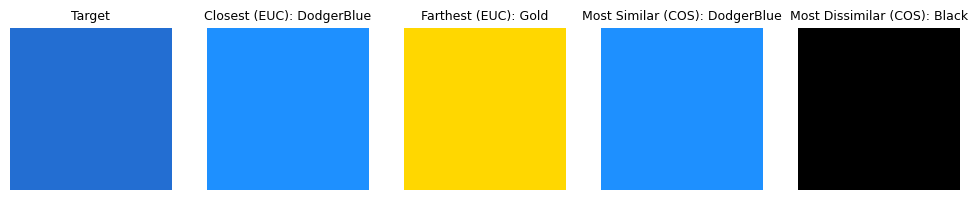

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# 1. 색상 목록 정의 (RGB 이름 + 값)
color_dict = {
    'AliceBlue': (240, 248, 255), 'AntiqueWhite': (250, 235, 215), 'Aqua': (0, 255, 255),
    'Aquamarine': (127, 255, 212), 'Azure': (240, 255, 255), 'Beige': (245, 245, 220),
    'Bisque': (255, 228, 196), 'Black': (0, 0, 0), 'BlanchedAlmond': (255, 235, 205),
    'Blue': (0, 0, 255), 'BlueViolet': (138, 43, 226), 'Brown': (165, 42, 42),
    'BurlyWood': (222, 184, 135), 'CadetBlue': (95, 158, 160), 'Chartreuse': (127, 255, 0),
    'Chocolate': (210, 105, 30), 'Coral': (255, 127, 80), 'CornflowerBlue': (100, 149, 237),
    'Cornsilk': (255, 248, 220), 'Crimson': (220, 20, 60), 'Cyan': (0, 255, 255),
    'DarkBlue': (0, 0, 139), 'DarkCyan': (0, 139, 139), 'DarkGoldenRod': (184, 134, 11),
    'DarkGray': (169, 169, 169), 'DarkGreen': (0, 100, 0), 'DarkKhaki': (189, 183, 107),
    'DarkMagenta': (139, 0, 139), 'DarkOliveGreen': (85, 107, 47), 'DarkOrange': (255, 140, 0),
    'DarkOrchid': (153, 50, 204), 'DarkRed': (139, 0, 0), 'DarkSalmon': (233, 150, 122),
    'DarkSeaGreen': (143, 188, 143), 'DarkSlateBlue': (72, 61, 139), 'DarkSlateGray': (47, 79, 79),
    'DarkTurquoise': (0, 206, 209), 'DarkViolet': (148, 0, 211), 'DeepPink': (255, 20, 147),
    'DeepSkyBlue': (0, 191, 255), 'DimGray': (105, 105, 105), 'DodgerBlue': (30, 144, 255),
    'FireBrick': (178, 34, 34), 'FloralWhite': (255, 250, 240), 'ForestGreen': (34, 139, 34),
    'Fuchsia': (255, 0, 255), 'Gainsboro': (220, 220, 220), 'GhostWhite': (248, 248, 255),
    'Gold': (255, 215, 0), 'GoldenRod': (218, 165, 32), 'Gray': (128, 128, 128),
    'Green': (0, 128, 0), 'GreenYellow': (173, 255, 47), 'HoneyDew': (240, 255, 240),
    'HotPink': (255, 105, 180), 'IndianRed': (205, 92, 92), 'Indigo': (75, 0, 130),
    'Ivory': (255, 255, 240), 'Khaki': (240, 230, 140), 'Lavender': (230, 230, 250),
    'LavenderBlush': (255, 240, 245), 'LawnGreen': (124, 252, 0), 'LemonChiffon': (255, 250, 205),
    'LightBlue': (173, 216, 230), 'LightCoral': (240, 128, 128), 'LightCyan': (224, 255, 255),
    'LightGoldenRodYellow': (250, 250, 210), 'LightGray': (211, 211, 211),
    'LightGreen': (144, 238, 144), 'LightPink': (255, 182, 193), 'LightSalmon': (255, 160, 122),
    'LightSeaGreen': (32, 178, 170), 'LightSkyBlue': (135, 206, 250), 'LightSlateGray': (119, 136, 153),
    'LightSteelBlue': (176, 196, 222), 'LightYellow': (255, 255, 224), 'Lime': (0, 255, 0),
    'LimeGreen': (50, 205, 50), 'Linen': (250, 240, 230), 'Magenta': (255, 0, 255),
    'Maroon': (128, 0, 0), 'MediumAquaMarine': (102, 205, 170), 'MediumBlue': (0, 0, 205),
    'MediumOrchid': (186, 85, 211), 'MediumPurple': (147, 112, 219), 'MediumSeaGreen': (60, 179, 113),
    'MediumSlateBlue': (123, 104, 238), 'MediumSpringGreen': (0, 250, 154)
}


# 2. 사용자 기준 색상 입력
target_rgb = tuple(map(int, input("기준 색상 RGB (예: 100 150 200): ").split()))
target_vec = np.array(target_rgb)

# 3. 거리 및 유사도 계산 함수
def euclidean(c1, c2):
    return norm(np.array(c1) - np.array(c2))

def cosine_similarity(c1, c2):
    c1, c2 = np.array(c1), np.array(c2)
    if norm(c1) == 0 or norm(c2) == 0:
        return 0
    return np.dot(c1, c2) / (norm(c1) * norm(c2))

# 4. 모든 색상과 거리/유사도 계산
euclidean_results = {}
cosine_results = {}

for name, rgb in color_dict.items():
    euclidean_results[name] = euclidean(target_rgb, rgb)
    cosine_results[name] = cosine_similarity(target_rgb, rgb)

# 5. 가장 가까운/먼 색상 추출
closest_euc = min(euclidean_results, key=euclidean_results.get)
farthest_euc = max(euclidean_results, key=euclidean_results.get)

closest_cos = max(cosine_results, key=cosine_results.get)
farthest_cos = min(cosine_results, key=cosine_results.get)

# 결과 출력
print("\n[기준 색상]", target_rgb)
print(f"\n[유클리드 거리 기준]")
print(f" - 가장 가까운 색: {closest_euc} {color_dict[closest_euc]}")
print(f" - 가장 먼 색:     {farthest_euc} {color_dict[farthest_euc]}")

print(f"\n[코사인 유사도 기준]")
print(f" - 가장 유사한 색: {closest_cos} {color_dict[closest_cos]}")
print(f" - 가장 다른 색:   {farthest_cos} {color_dict[farthest_cos]}")

#  시각화할 색상 리스트 구성
colors_to_plot = {
    'Target': target_rgb,
    f'Closest (EUC): {closest_euc}': color_dict[closest_euc],
    f'Farthest (EUC): {farthest_euc}': color_dict[farthest_euc],
    f'Most Similar (COS): {closest_cos}': color_dict[closest_cos],
    f'Most Dissimilar (COS): {farthest_cos}': color_dict[farthest_cos]
}

# 시각화
plt.figure(figsize=(10, 2))
for i, (label, rgb) in enumerate(colors_to_plot.items()):
    plt.subplot(1, 5, i+1)
    plt.imshow([[(np.array(rgb)/255)]])
    plt.title(label, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()

